# Demonstration Notebook

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load all our code

import preprocess
import data
import model
import train
import loss

## PreProcessing

In [3]:
# DATA_FOLDER Assume a train/val/test split of the files.

DATA_FOLDER = "path/to/NinaPro/DB"
DB = "DB7"

In [ ]:
# Run once

if False:
    preprocess.NinaProPreprocessor(f"{DATA_FOLDER}/train", DB).preprocess()
    preprocess.NinaProPreprocessor(f"{DATA_FOLDER}/val", DB).preprocess()
    preprocess.NinaProPreprocessor(f"{DATA_FOLDER}/test", DB).preprocess()

S10_E1_A1.mat
S10_E2_A1.mat
S16_E1_A1.mat
S16_E2_A1.mat
S18_E1_A1.mat
S18_E2_A1.mat
S19_E1_A1.mat
S19_E2_A1.mat
S1_E1_A1.mat
S1_E2_A1.mat
S20_E1_A1.mat
S20_E2_A1.mat
S21_E1_A1.mat
WARNIING: Missing key glove in S21_E1_A1.mat! Skipping it.
S21_E2_A1.mat
WARNIING: Missing key glove in S21_E2_A1.mat! Skipping it.
S2_E1_A1.mat
S2_E2_A1.mat
S3_E1_A1.mat
S3_E2_A1.mat
S4_E1_A1.mat
S4_E2_A1.mat
S7_E1_A1.mat
S7_E2_A1.mat
S11_E1_A1.mat
S11_E2_A1.mat
S13_E1_A1.mat
S13_E2_A1.mat
S22_E1_A1.mat
WARNIING: Missing key glove in S22_E1_A1.mat! Skipping it.
S22_E2_A1.mat
WARNIING: Missing key glove in S22_E2_A1.mat! Skipping it.
S6_E1_A1.mat
S6_E2_A1.mat
S8_E1_A1.mat
S8_E2_A1.mat
S12_E1_A1.mat
S12_E2_A1.mat
S14_E1_A1.mat
S14_E2_A1.mat
S15_E1_A1.mat
S15_E2_A1.mat
S17_E1_A1.mat
S17_E2_A1.mat
S5_E1_A1.mat
S5_E2_A1.mat
S9_E1_A1.mat
S9_E2_A1.mat


In [5]:
# Load the datasets

# 1s seq lengths
train_dataset = data.SequenceDataset(f"{DATA_FOLDER}/train", seq_len=400)

# No seq length => Take directly entire sequences
train_testing_dataset = data.SequenceDataset(f"{DATA_FOLDER}/train")
val_dataset= data.SequenceDataset(f"{DATA_FOLDER}/val")
test_dataset= data.SequenceDataset(f"{DATA_FOLDER}/test")

S10_E1_A1.npz
S10_E2_A1.npz
S16_E1_A1.npz
S16_E2_A1.npz
S18_E1_A1.npz
S18_E2_A1.npz
S19_E1_A1.npz
S19_E2_A1.npz
S1_E1_A1.npz
S1_E2_A1.npz
S20_E1_A1.npz
S20_E2_A1.npz
S2_E1_A1.npz
S2_E2_A1.npz
S3_E1_A1.npz
S3_E2_A1.npz
S4_E1_A1.npz
S4_E2_A1.npz
S7_E1_A1.npz
S7_E2_A1.npz
S10_E1_A1.npz
S10_E2_A1.npz
S16_E1_A1.npz
S16_E2_A1.npz
S18_E1_A1.npz
S18_E2_A1.npz
S19_E1_A1.npz
S19_E2_A1.npz
S1_E1_A1.npz
S1_E2_A1.npz
S20_E1_A1.npz
S20_E2_A1.npz
S2_E1_A1.npz
S2_E2_A1.npz
S3_E1_A1.npz
S3_E2_A1.npz
S4_E1_A1.npz
S4_E2_A1.npz
S7_E1_A1.npz
S7_E2_A1.npz
S11_E1_A1.npz
S11_E2_A1.npz
S13_E1_A1.npz
S13_E2_A1.npz
S6_E1_A1.npz
S6_E2_A1.npz
S8_E1_A1.npz
S8_E2_A1.npz
S12_E1_A1.npz
S12_E2_A1.npz
S14_E1_A1.npz
S14_E2_A1.npz
S15_E1_A1.npz
S15_E2_A1.npz
S17_E1_A1.npz
S17_E2_A1.npz
S5_E1_A1.npz
S5_E2_A1.npz
S9_E1_A1.npz
S9_E2_A1.npz


In [6]:
# Compute mean and std

size = 0
mean_emg, mean_glove = 0, 0
var_emg, var_glove = 0, 0
for user in train_dataset.data:
    s = user["emg"].shape[0]
    mean_emg += user["emg"].sum(axis=0)
    var_emg += user["emg"].var(axis=0) * s
    mean_glove += user["glove"].sum(axis=0)
    var_glove += user["glove"].var(axis=0) * s
    size += s

mean_emg /= size
mean_emg = mean_emg.astype(np.float32)
var_emg /= size
std_emg = np.sqrt(var_emg).astype(np.float32)

mean_glove /= size
mean_glove = mean_glove.astype(np.float32)
var_glove /= size
std_glove = np.sqrt(var_glove).astype(np.float32)

mean_emg, std_emg, mean_glove, std_glove

(array([ 2.2313735e-07, -3.1442204e-07,  1.6850504e-07, -4.7941611e-09,
         5.8433325e-09, -2.7219210e-08,  9.6096983e-08,  1.5596912e-07,
        -2.1100456e-08, -1.0721238e-09, -9.1652108e-09,  1.7289223e-07],
       dtype=float32),
 array([4.0994350e-05, 4.1789870e-05, 3.7992831e-05, 9.3620965e-06,
        2.0401958e-05, 3.5908692e-05, 2.3508852e-05, 3.9665771e-05,
        2.4492954e-05, 4.3591033e-05, 1.3078624e-05, 1.1257715e-05],
       dtype=float32),
 array([  14.868566 ,  -12.0781355,   -7.432492 ,  -17.600767 ,
          18.685097 ,   26.666077 ,   34.314037 ,   48.66511  ,
        -120.71939  ,   26.20249  ,   57.16536  , -117.74066  ,
          24.090275 ,   77.174576 ,  -85.49154  ,    2.0168169,
         -66.30819  ,  -69.81177  ], dtype=float32),
 array([23.149239 ,  9.66464  , 14.860536 ,  7.059785 , 15.753144 ,
        20.348875 , 23.288733 , 21.903776 ,  2.7466004, 19.342531 ,
        26.53861  ,  8.006852 , 24.897646 , 37.460354 ,  3.8170683,
        17.174938 ,

In [7]:
# Standardize input data

emg_normalizer = data.Normalizer(mean_emg, std_emg)
train_dataset.transform({"emg": emg_normalizer})
train_testing_dataset.transform({"emg": emg_normalizer})
val_dataset.transform({"emg": emg_normalizer})
test_dataset.transform({"emg": emg_normalizer})

In [8]:
# Compute mean baseline on all the datasets

def baseline(mean, test_set):
    loss = 0
    size = 0
    for _, _, glove in test_set:
        size += glove.shape[0]
        loss += np.abs((glove - mean)).sum()

    return loss / size / glove.shape[-1]

train_baseline = baseline(mean_glove, train_testing_dataset)
val_baseline = baseline(mean_glove, val_dataset)
test_baseline = baseline(mean_glove, test_dataset)

train_baseline, val_baseline, test_baseline

(14.311668347196921, 14.940329707795293, 15.423912630348958)

## Training 

In [33]:
# Data loaders

batch = 2048
train_loader = torch.utils.data.DataLoader(train_dataset, shuffle=True, batch_size=batch, drop_last=True)

# Use batch of 1. As sequence have not the same size (full exercise sequence here)
val_loader = torch.utils.data.DataLoader(val_dataset, shuffle=False, batch_size=1)
test_loader = torch.utils.data.DataLoader(test_dataset, shuffle=False, batch_size=1)
train_testing_loader = torch.utils.data.DataLoader(train_testing_dataset, shuffle=False, batch_size=1)

In [34]:
# Define the model

device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(device)

m = model.LSTMModel(12, 128, 18, 1, 0.5)
m.to(device)

cuda


LSTMModel(
  (dropout): Dropout(p=0.5, inplace=False)
  (lstm): LSTM(12, 128, batch_first=True)
  (fc): Linear(in_features=128, out_features=18, bias=True)
)

In [35]:
# Training loop... Take some time.

optimizer = torch.optim.Adam(m.parameters(), lr=0.001)
train_criterion = loss.MovementLoss(2, decay_power=1)
val_criterion = torch.nn.L1Loss(reduction="sum")

losses = []

for e in range(5):
    print(f"Epoch {e}:")
    train.train(m, train_loader, optimizer, train_criterion, e, device, logging_freq=100)
    losses.append(train.validation(m, val_loader, val_criterion, device))
    torch.save(m.state_dict(), f"model_{e}.pt")

Epoch 0:
Train Epoch: 0 [0/8649651 (0%)]	Loss: 1124.235474
Train Epoch: 0 [204800/8649651 (2%)]	Loss: 740.859436
Train Epoch: 0 [409600/8649651 (5%)]	Loss: 568.068909
Train Epoch: 0 [614400/8649651 (7%)]	Loss: 463.537567
Train Epoch: 0 [819200/8649651 (9%)]	Loss: 405.793701
Train Epoch: 0 [1024000/8649651 (12%)]	Loss: 459.455292
Train Epoch: 0 [1228800/8649651 (14%)]	Loss: 457.308197
Train Epoch: 0 [1433600/8649651 (17%)]	Loss: 276.424469
Train Epoch: 0 [1638400/8649651 (19%)]	Loss: 255.389786
Train Epoch: 0 [1843200/8649651 (21%)]	Loss: 247.739761
Train Epoch: 0 [2048000/8649651 (24%)]	Loss: 228.908722
Train Epoch: 0 [2252800/8649651 (26%)]	Loss: 216.759033
Train Epoch: 0 [2457600/8649651 (28%)]	Loss: 220.210922
Train Epoch: 0 [2662400/8649651 (31%)]	Loss: 209.873505
Train Epoch: 0 [2867200/8649651 (33%)]	Loss: 258.628601
Train Epoch: 0 [3072000/8649651 (36%)]	Loss: 239.312881
Train Epoch: 0 [3276800/8649651 (38%)]	Loss: 218.400040
Train Epoch: 0 [3481600/8649651 (40%)]	Loss: 208.0398

In [36]:
# Load a specific epoch [optional]
e = 1
m.load_state_dict(torch.load(f"model_{e}.pt"))

<All keys matched successfully>

# Evaluate

In [37]:
# Evaluate on test set
train.validation(m, test_loader, val_criterion, device)


Validation set: Average loss: 15.0587


15.058662353486994

In [38]:
# Evaluate on train set to check that we did at least beat the mean baseline here
train.validation(m, train_testing_loader, val_criterion, device)


Validation set: Average loss: 11.2158


11.215814800368163

## Plots

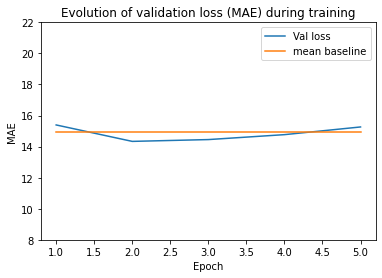

In [40]:
# Validation loss versus mean baseline

plt.title("Evolution of validation loss (MAE) during training")

plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.ylim(8, 22)
plt.plot(range(1, 6), losses, label="Val loss")
plt.plot(range(1, 6), [val_baseline]*5, label="mean baseline")
plt.legend()
plt.show()

In [41]:
# Check predictions

# emg, stimulus, glove = train_testing_dataset.data[0]
emg, stimulus, glove = test_dataset[0]
input_ = torch.FloatTensor(emg[None, ...]).to(device)
glove_p = m(input_)[0][0].cpu().detach().numpy()

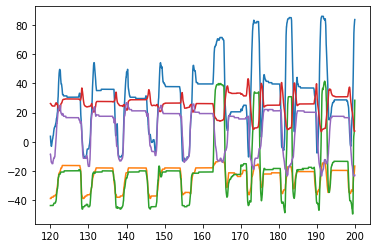

In [48]:
# Plot the glove angles over 80 seconds from timestamp 120

start = 120 * 400
delta = 80 * 400

plt.plot(np.arange(start, start + delta)/400, glove[start:(start+delta)][:,:5])
plt.show()

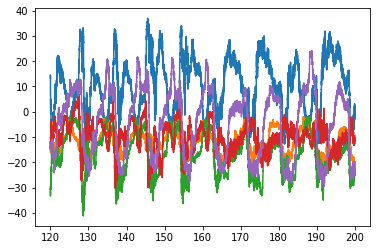

In [49]:
# Compare with the predicted one

plt.plot(np.arange(start, start + delta)/400, glove_p[start:(start+delta)][:,:5])
plt.show()

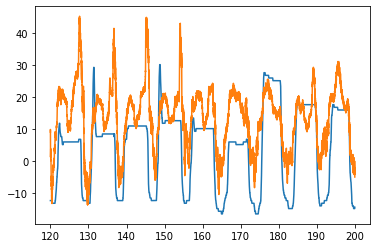

In [56]:
# Focus on a particular glove angle.

plt.plot(np.arange(start, start + delta)/400, glove[start:(start+delta),5])
plt.plot(np.arange(start, start + delta)/400, glove_p[start:(start+delta),5])
plt.show()